## Abalone Case Study

Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

In [86]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [87]:
df=pd.read_csv('abaolne.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [88]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [90]:
df.head(7)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20


In [91]:
df.tail(7)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4170,M,0.550,0.430,0.130,0.8395,0.3155,0.1955,0.2405,10
4171,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [92]:
df.value_counts()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  Shell weight  Rings
F    0.275   0.195     0.070   0.0800        0.0310          0.0215          0.0250        5        1
M    0.400   0.320     0.095   0.3030        0.1335          0.0600          0.1000        7        1
     0.405   0.305     0.120   0.3185        0.1235          0.0905          0.0950        7        1
             0.310     0.100   0.3850        0.1730          0.0915          0.1100        7        1
     0.410   0.300     0.100   0.3010        0.1240          0.0690          0.0900        9        1
                                                                                                   ..
I    0.250   0.185     0.065   0.0710        0.0270          0.0185          0.0225        5        1
             0.190     0.060   0.0765        0.0360          0.0115          0.0245        6        1
                       0.065   0.0835        0.0390          0.0150          0.0250    

In [93]:
# Checking the Missing Value
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

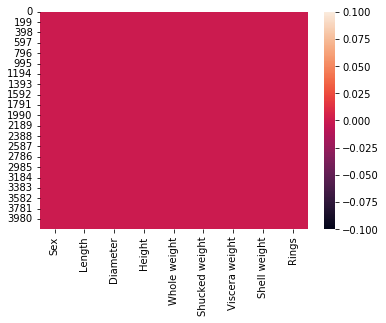

In [94]:
sns.heatmap(df.isnull())

### Visualization of Data

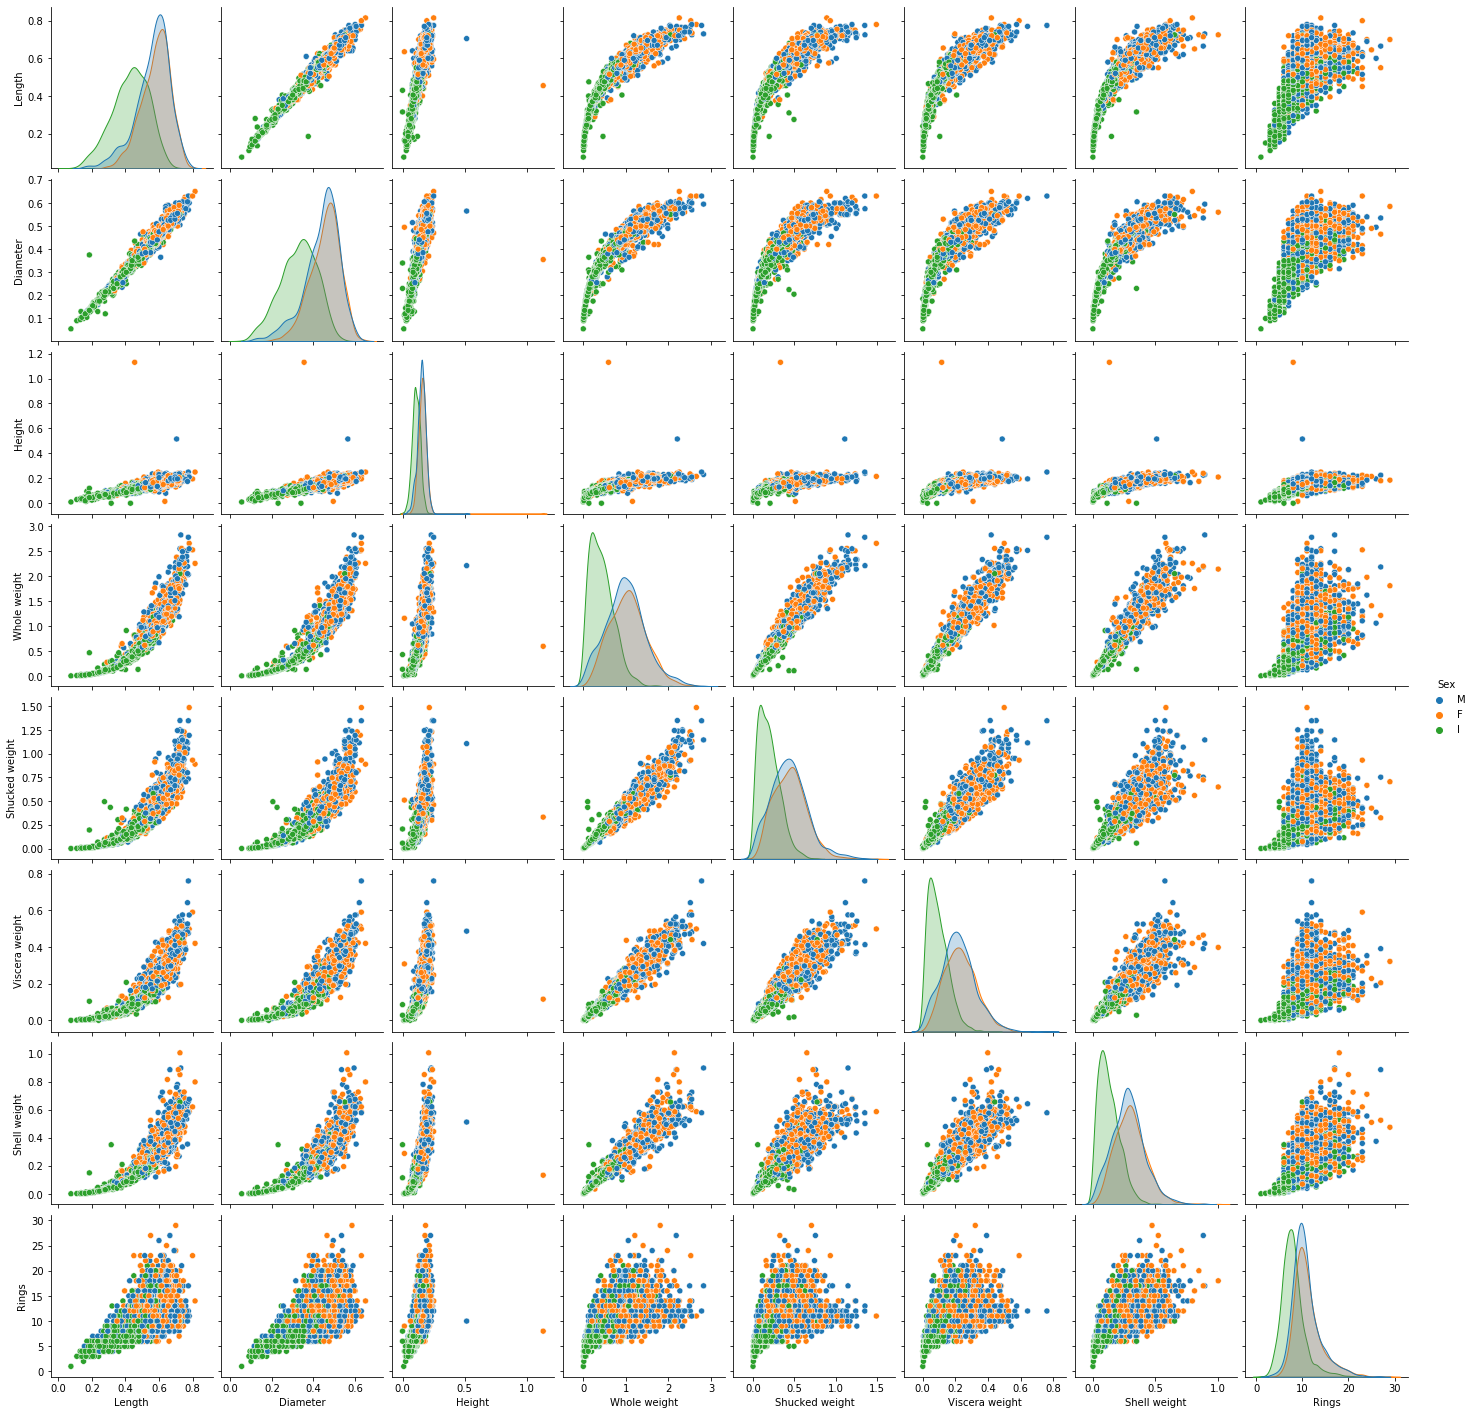

In [95]:
sns.pairplot(df,hue='Sex')

In [96]:
# Checking the Correction
dfcorr=df.corr()
dfcorr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


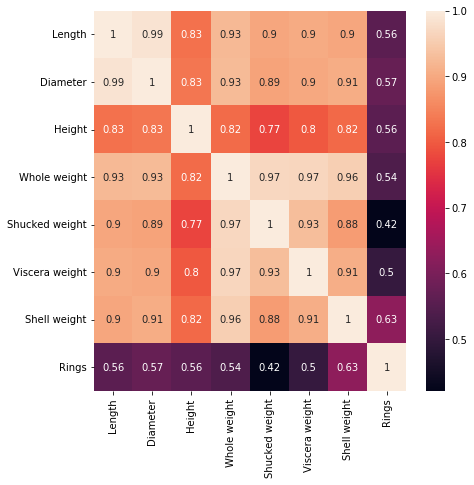

In [97]:
plt.figure(figsize=(7,7))
sns.heatmap(dfcorr,annot=True)

In [98]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

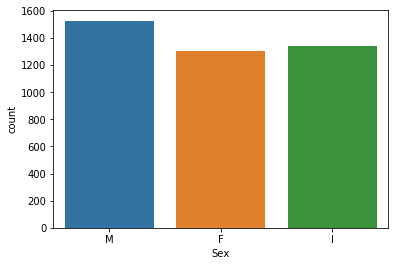

In [99]:
sns.countplot(x='Sex',data=df)

In [100]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023CF10E9108>,
      dtype=object)

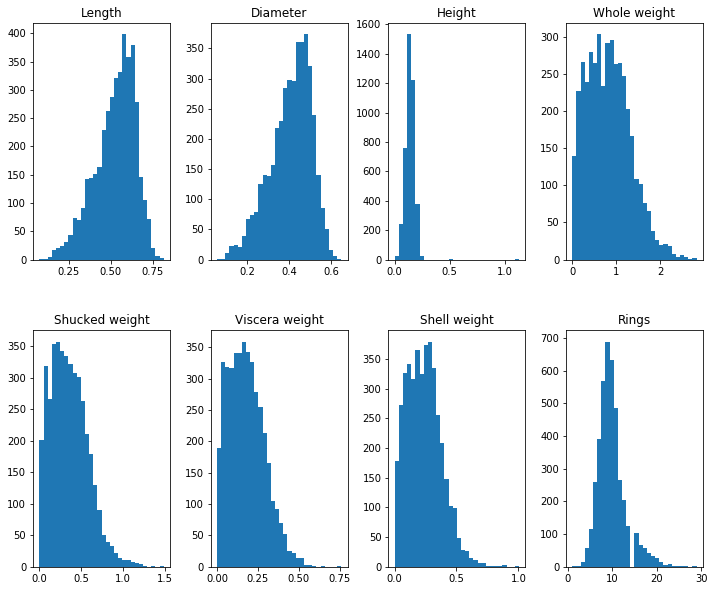

In [101]:
df.hist(figsize=(12,10),grid=False,layout=(2,4),bins=30)

In [102]:
df['Age']=df['Rings']+1.5               # Abalone Age
df.drop('Rings',axis=1,inplace=True)

In [103]:
df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


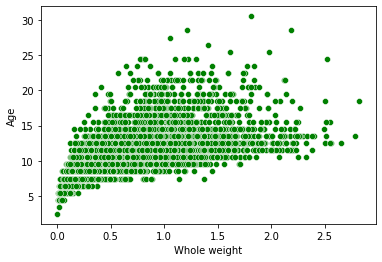

<Figure size 720x720 with 0 Axes>

In [104]:
sns.scatterplot(df['Whole weight'],df['Age'],color='green')
plt.xlabel('Whole weight')
plt.ylabel('Age')
plt.figure(figsize=(10,10))
plt.show()

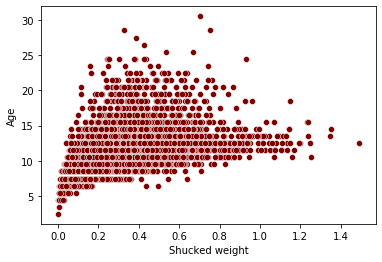

<Figure size 720x720 with 0 Axes>

In [105]:
sns.scatterplot(df['Shucked weight'],df['Age'],color='maroon')
plt.xlabel('Shucked weight')
plt.ylabel('Age')
plt.figure(figsize=(10,10))
plt.show()

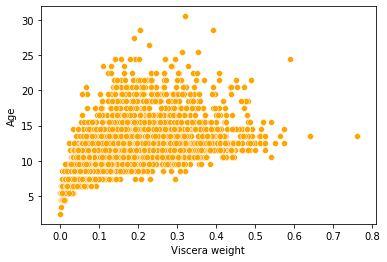

<Figure size 720x720 with 0 Axes>

In [106]:
sns.scatterplot(df['Viscera weight'],df['Age'],color='orange')
plt.xlabel('Viscera weight')
plt.ylabel('Age')
plt.figure(figsize=(10,10))
plt.show()

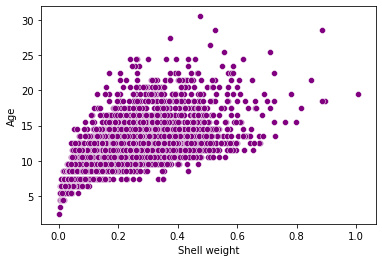

<Figure size 720x720 with 0 Axes>

In [107]:
sns.scatterplot(df['Shell weight'],df['Age'],color='purple')
plt.xlabel('Shell weight')
plt.ylabel('Age')
plt.figure(figsize=(10,10))
plt.show()

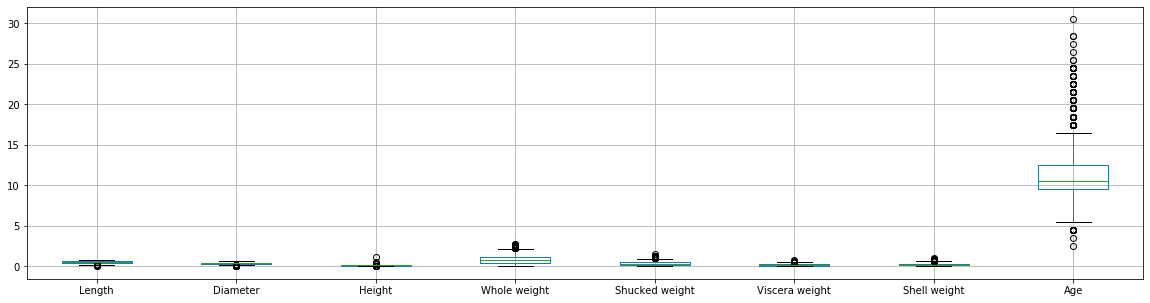

In [108]:
df.boxplot(figsize=(20,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023CF179D548>,
      dtype=object)

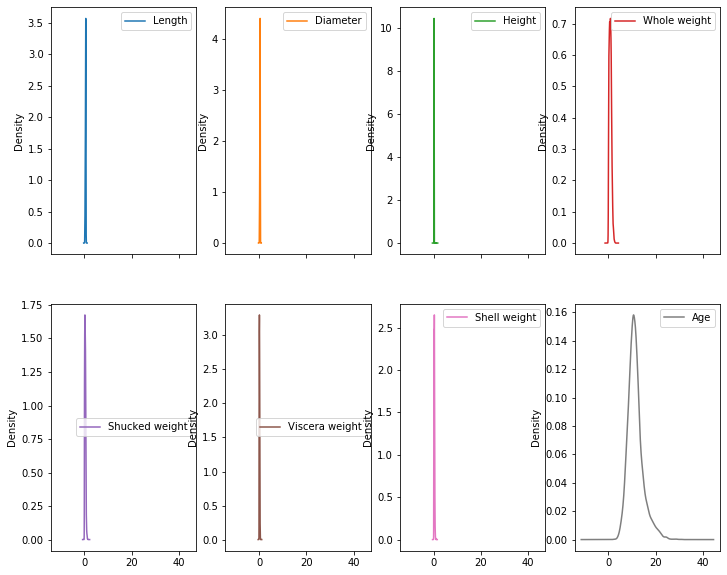

In [109]:
df.plot(kind='kde', layout=(2,4),subplots=True,figsize=(12,10))

Length               AxesSubplot(0.125,0.536818;0.168478x0.343182)
Diameter          AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Height            AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Whole weight      AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Shucked weight          AxesSubplot(0.125,0.125;0.168478x0.343182)
Viscera weight       AxesSubplot(0.327174,0.125;0.168478x0.343182)
Shell weight         AxesSubplot(0.529348,0.125;0.168478x0.343182)
Age                  AxesSubplot(0.731522,0.125;0.168478x0.343182)
dtype: object

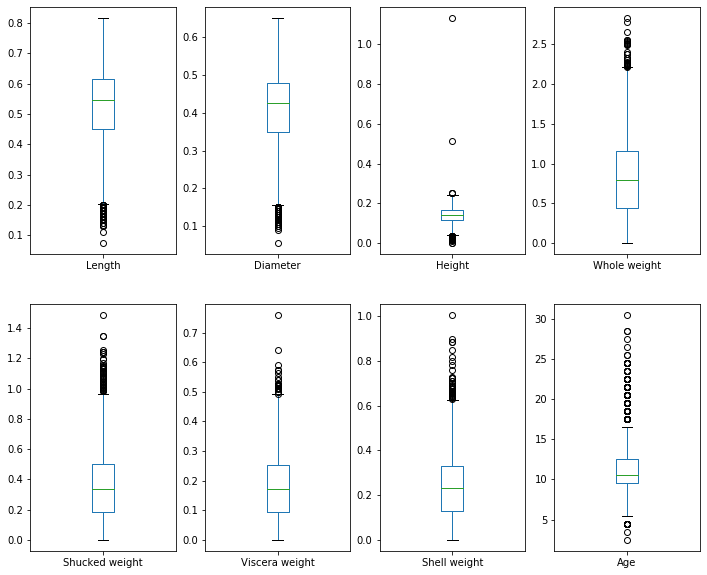

In [110]:
df.plot(kind='box', layout=(2,4),subplots=True,figsize=(12,10))

In [111]:
df_new=df.drop('Sex',axis=1)
df_new

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


### Skewness

In [112]:
df.skew().sort_values()

Length           -0.639873
Diameter         -0.609198
Whole weight      0.530959
Viscera weight    0.591852
Shell weight      0.620927
Shucked weight    0.719098
Age               1.114102
Height            3.128817
dtype: float64

In [113]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Age               float64
dtype: object

In [114]:
df_new['Age']=df_new['Age'].astype('int64')  #Converting the Age from float to int data type

In [115]:
df_new.dtypes

Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Age                 int64
dtype: object

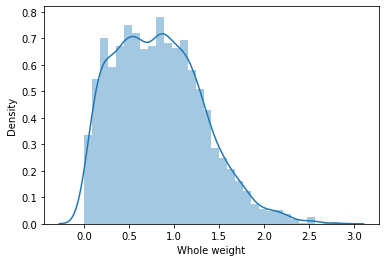

In [116]:
sns.distplot(df['Whole weight'])

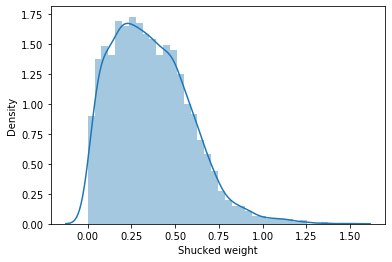

In [117]:
sns.distplot(df['Shucked weight'])

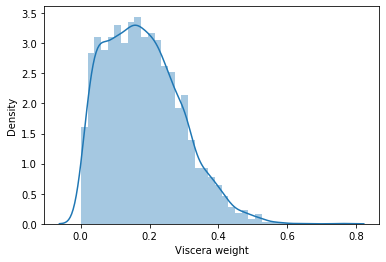

In [118]:
sns.distplot(df['Viscera weight'])

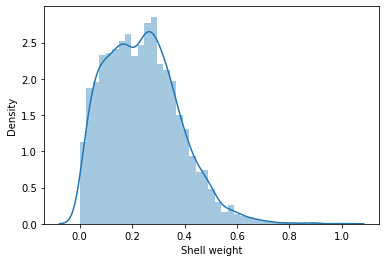

In [119]:
sns.distplot(df['Shell weight'])

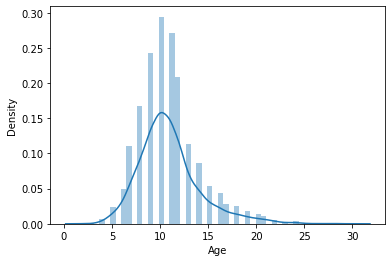

In [120]:
sns.distplot(df_new['Age'])

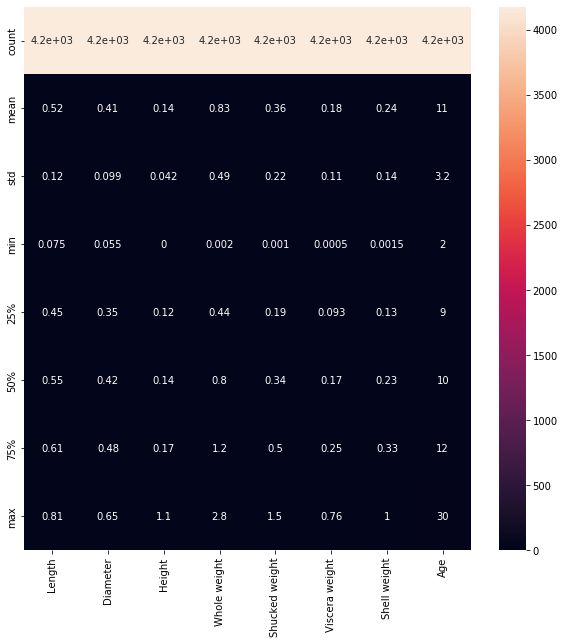

In [121]:
plt.figure(figsize=(10,10))
sns.heatmap(df_new.describe(),annot=True)

In [122]:
# Removing the Outliers

from scipy.stats import zscore
z=np.abs(zscore(df_new))
z

array([[0.57455813, 0.43214879, 1.06442415, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.44898585, 1.439929  , 1.18397831, ..., 1.20522124, 1.21298732,
        0.91001299],
       [0.05003309, 0.12213032, 0.10799087, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [0.6329849 , 0.67640943, 1.56576738, ..., 0.97541324, 0.49695471,
        0.28962385],
       [0.84118198, 0.77718745, 0.25067161, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.54905203, 1.48263359, 1.32665906, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [123]:
thresholds=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [124]:
df_new=df_new[(z<3).all(axis=1)]
df_new

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11


In [125]:
df.shape

(4177, 9)

In [126]:
df_new.shape # After removing the outliers

(4027, 8)

In [127]:
x=df_new.drop(columns='Age')
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [128]:
y=df_new['Age']
y

0       16
1        8
2       10
3       11
4        8
        ..
4172    12
4173    11
4174    10
4175    11
4176    13
Name: Age, Length: 4027, dtype: int64

In [129]:
scaled=StandardScaler()
x_scaled=scaled.fit_transform(x)
x_scaled

array([[-0.56936804, -0.42027443, -1.16620737, ..., -0.6037333 ,
        -0.72305677, -0.63065934],
       [-1.47535808, -1.4631268 , -1.30180583, ..., -1.20941043,
        -1.23110406, -1.25603283],
       [ 0.07776771,  0.15329438, -0.08141969, ..., -0.44867996,
        -0.33113458, -0.16162923],
       ...,
       [ 0.68176107,  0.72686319,  1.81695876, ...,  0.85473721,
         1.08172072,  0.60445329],
       [ 0.89747298,  0.83114842,  0.32537569, ...,  0.88138701,
         0.82527781,  0.51064727],
       [ 1.63089349,  1.56114509,  1.54576184, ...,  2.88981235,
         1.94298183,  2.06626381]])

### Variance Inflation Factor

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features']=x.columns
vif

,VIF,Features
0,38.928216,Length
1,40.430421,Diameter
2,6.545365,Height
3,107.982493,Whole weight
4,28.481585,Shucked weight
5,17.066237,Viscera weight
6,23.490464,Shell weight


### Training and Testing the data

In [131]:
train_x,test_x,train_y,test_y=train_test_split(x_scaled,y,test_size=.30,random_state=42)

In [132]:
train_x.shape

(2818, 7)

In [133]:
test_x.shape

(1209, 7)

In [134]:
train_y.shape

(2818,)

In [135]:
test_y.shape

(1209,)

In [136]:
# Model Building
lr=LinearRegression()
lr.fit(train_x,train_y)


LinearRegression()

In [137]:
lr.coef_

array([-0.24446646,  1.13667868,  0.87558858,  3.06446933, -3.55076167,
       -0.69369048,  1.02696274])

In [138]:
lr.intercept_

10.699967616020468

In [139]:
lr.score(train_x,train_y)

0.5162042087623991

In [140]:
pred=lr.predict(test_x)
pred

array([ 9.63194706, 11.06633345, 12.56167495, ...,  9.25937735,
        7.56145383, 13.01449306])

In [141]:
print("Predicted Value\n",pred,"\n")
print("Actual Value\n",test_y)

Predicted Value
 [ 9.63194706 11.06633345 12.56167495 ...  9.25937735  7.56145383
 13.01449306] 

Actual Value
 2514     9
855     10
2495    13
2160    20
1060     8
        ..
200     10
1917    11
3707    12
2815     8
3368    14
Name: Age, Length: 1209, dtype: int64


#### Saving the Predicted and actual age in CSV Format

In [142]:
df_new.to_csv('Abaolne Age Predictions.csv')

### Cross Validation

In [143]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,x,y,cv=5)
print("Cross Validation Score is",score,"\n")
print("Mean is:",score.mean())
print("Standard Deviaion is:",score.std())

Cross Validation Score is [0.3932228  0.21334049 0.49661527 0.49987958 0.47055586] 

Mean is: 0.41472280082211943
Standard Deviaion is: 0.10778911533617784


In [144]:
# Checking the accuracy using various model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier(random_state=4)
svm=SVC(kernel='linear')
knn=KNeighborsClassifier()


In [145]:
for clf in (rfc,svm,knn,dtc):
    clf.fit(train_x,train_y)
    y_pred=clf.predict(test_x)
    print(clf.__class__.__name__,accuracy_score(test_y,y_pred))

RandomForestClassifier 0.24648469809760132
SVC 0.261373035566584
KNeighborsClassifier 0.21505376344086022
DecisionTreeClassifier 0.19272125723738626


### Accuracy Score

In [146]:
from sklearn.metrics import r2_score
print("Accuracy Score is:",r2_score(test_y,pred))

Accuracy Score is: 0.5041015223903342


### Hyper Parameter Tuning

In [147]:
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(2,10,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random']
}

In [148]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=3,n_jobs=1,verbose=3)

In [149]:
grid_search.fit(train_x,train_y)

Fitting 3 folds for each of 2304 candidates, totalling 6912 fits
[CV 1/3] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.245 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.253 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.256 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.221 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.263 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.256 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.245 total time=   0.0s
[CV 2/3] END criter

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=3)

In [150]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'splitter': 'random'}

In [151]:
grid_search.best_score_

0.27643297910105064

In [152]:
accuracy = cross_val_score(knn,x, y, scoring = 'accuracy',cv=10)
accuracy

array([0.17866005, 0.19602978, 0.24813896, 0.26550868, 0.22828784,
       0.22332506, 0.27047146, 0.22636816, 0.25124378, 0.26119403])

In [153]:
accuracy = cross_val_score(rfc,x, y, scoring = 'accuracy',cv=10)
accuracy

array([0.191067  , 0.21588089, 0.27791563, 0.25806452, 0.24565757,
       0.27047146, 0.28039702, 0.22885572, 0.26119403, 0.28855721])

In [156]:
print("Predicted Age:\n",y_pred,"\n")
print("Actual Age:\n",test_y)

Predicted Age:
 [ 9 10 14 ... 10  7 14] 

Actual Age:
 2514     9
855     10
2495    13
2160    20
1060     8
        ..
200     10
1917    11
3707    12
2815     8
3368    14
Name: Age, Length: 1209, dtype: int64


# Saving the model

In [161]:
import pickle
filename='Abalone_age_prediction.pickle'
pickle.dump(svm,open(filename,'wb'))

In [163]:
loaded_model=pickle.load(open(filename,'rb'))
loaded_model.predict(test_x)

array([ 9, 10, 11, ..., 10,  7, 11], dtype=int64)